In [2]:
# Load all the needed libraries for a machine learning project
import os, sys, time, random, math, datetime, pickle, warnings, json, re, string, glob, itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import sklearn
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.feature_selection as feature_selection
import sklearn.linear_model as linear_model
import sklearn.ensemble as ensemble
import sklearn.tree as tree
import sklearn.svm as svm
import sklearn.cluster as cluster
import sklearn.neighbors as neighbors
import sklearn.neural_network as neural_network
import sklearn.decomposition as decomposition
import sklearn.pipeline as pipeline
import sklearn.utils as utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import cv2
from PIL import Image
import tqdm

# Ignore all warning messages
warnings.filterwarnings('ignore')

c:\ProgramData\Anaconda3\envs\ai_39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# loading the data
Ximg1 = pd.read_csv('data/Ximg1.csv')
Ximg2 = pd.read_csv('data/Ximg2.csv')
Xtab1 = pd.read_csv('data/Xtab1.csv')
Xtab2 = pd.read_csv('data/Xtab2.csv')
Y1 = pd.read_csv('data/Y1.csv')

# show the first 5 rows of the data
print('Ximg1')
display(Ximg1.head())
# print('Ximg2')
# display(Ximg2.head())
print('Xtab1')
display(Xtab1.head())
# print('Xtab2')
# display(Xtab2.head())
print('Y1')
display(Y1.head())

Ximg1


,h1,h2,h3,h4,h5,h6,h7,h8,img_filename
0,-0.400470,0.115542,-0.429741,0.391250,0.274615,-0.302454,0.172267,-0.285046,heart_509.png
1,-0.370681,0.109838,-0.413651,0.425773,0.218042,-0.278049,0.181184,-0.212044,heart_159.png
2,-0.351391,0.043292,-0.394782,0.379718,0.191864,-0.226267,0.145120,-0.253251,heart_502.png
3,-0.346954,0.077403,-0.428344,0.384614,0.244609,-0.259138,0.169757,-0.293084,heart_947.png
4,-0.368318,0.089293,-0.421365,0.402795,0.243602,-0.224189,0.157585,-0.300966,heart_1029.png


Xtab1


,age,blood pressure,blood type,cholesterol,hemoglobin,physical activity,sarsaparilla,smurfberry liquor,smurfin donuts,temperature,testosterone,weight,img_filename
0,113,94.65,O+,103.63,14.32,No,Moderate,High,High,36.40,891.91,101.34,heart_509.png
1,160,102.33,AB+,131.44,15.85,Yes,Very low,High,Very high,37.17,672.22,117.66,heart_159.png
2,193,121.94,A+,156.47,13.02,No,Very high,Moderate,Very high,36.84,951.98,111.73,heart_502.png
3,130,96.02,O+,126.46,12.91,Yes,Low,High,High,37.89,609.18,80.75,heart_947.png
4,145,92.00,B+,102.23,14.72,Yes,Very low,Low,High,37.40,573.76,77.11,heart_1029.png


Y1


,Y
0,0.26
1,0.08
2,0.27
3,0.08
4,0.06


In [4]:
# concatinate Y1 to Xtab1
Xtab1 = pd.concat([Xtab1, Y1], axis=1)
print('Xtab1')
display(Xtab1.head())

Xtab1


,age,blood pressure,blood type,cholesterol,hemoglobin,physical activity,sarsaparilla,smurfberry liquor,smurfin donuts,temperature,testosterone,weight,img_filename,Y
0,113,94.65,O+,103.63,14.32,No,Moderate,High,High,36.40,891.91,101.34,heart_509.png,0.26
1,160,102.33,AB+,131.44,15.85,Yes,Very low,High,Very high,37.17,672.22,117.66,heart_159.png,0.08
2,193,121.94,A+,156.47,13.02,No,Very high,Moderate,Very high,36.84,951.98,111.73,heart_502.png,0.27
3,130,96.02,O+,126.46,12.91,Yes,Low,High,High,37.89,609.18,80.75,heart_947.png,0.08
4,145,92.00,B+,102.23,14.72,Yes,Very low,Low,High,37.40,573.76,77.11,heart_1029.png,0.06


Ximg1 columns
14 Index(['age', 'blood pressure', 'blood type', 'cholesterol', 'hemoglobin',
       'physical activity', 'sarsaparilla', 'smurfberry liquor',
       'smurfin donuts', 'temperature', 'testosterone', 'weight',
       'img_filename', 'Y'],
      dtype='object')
Ximg1 distribution


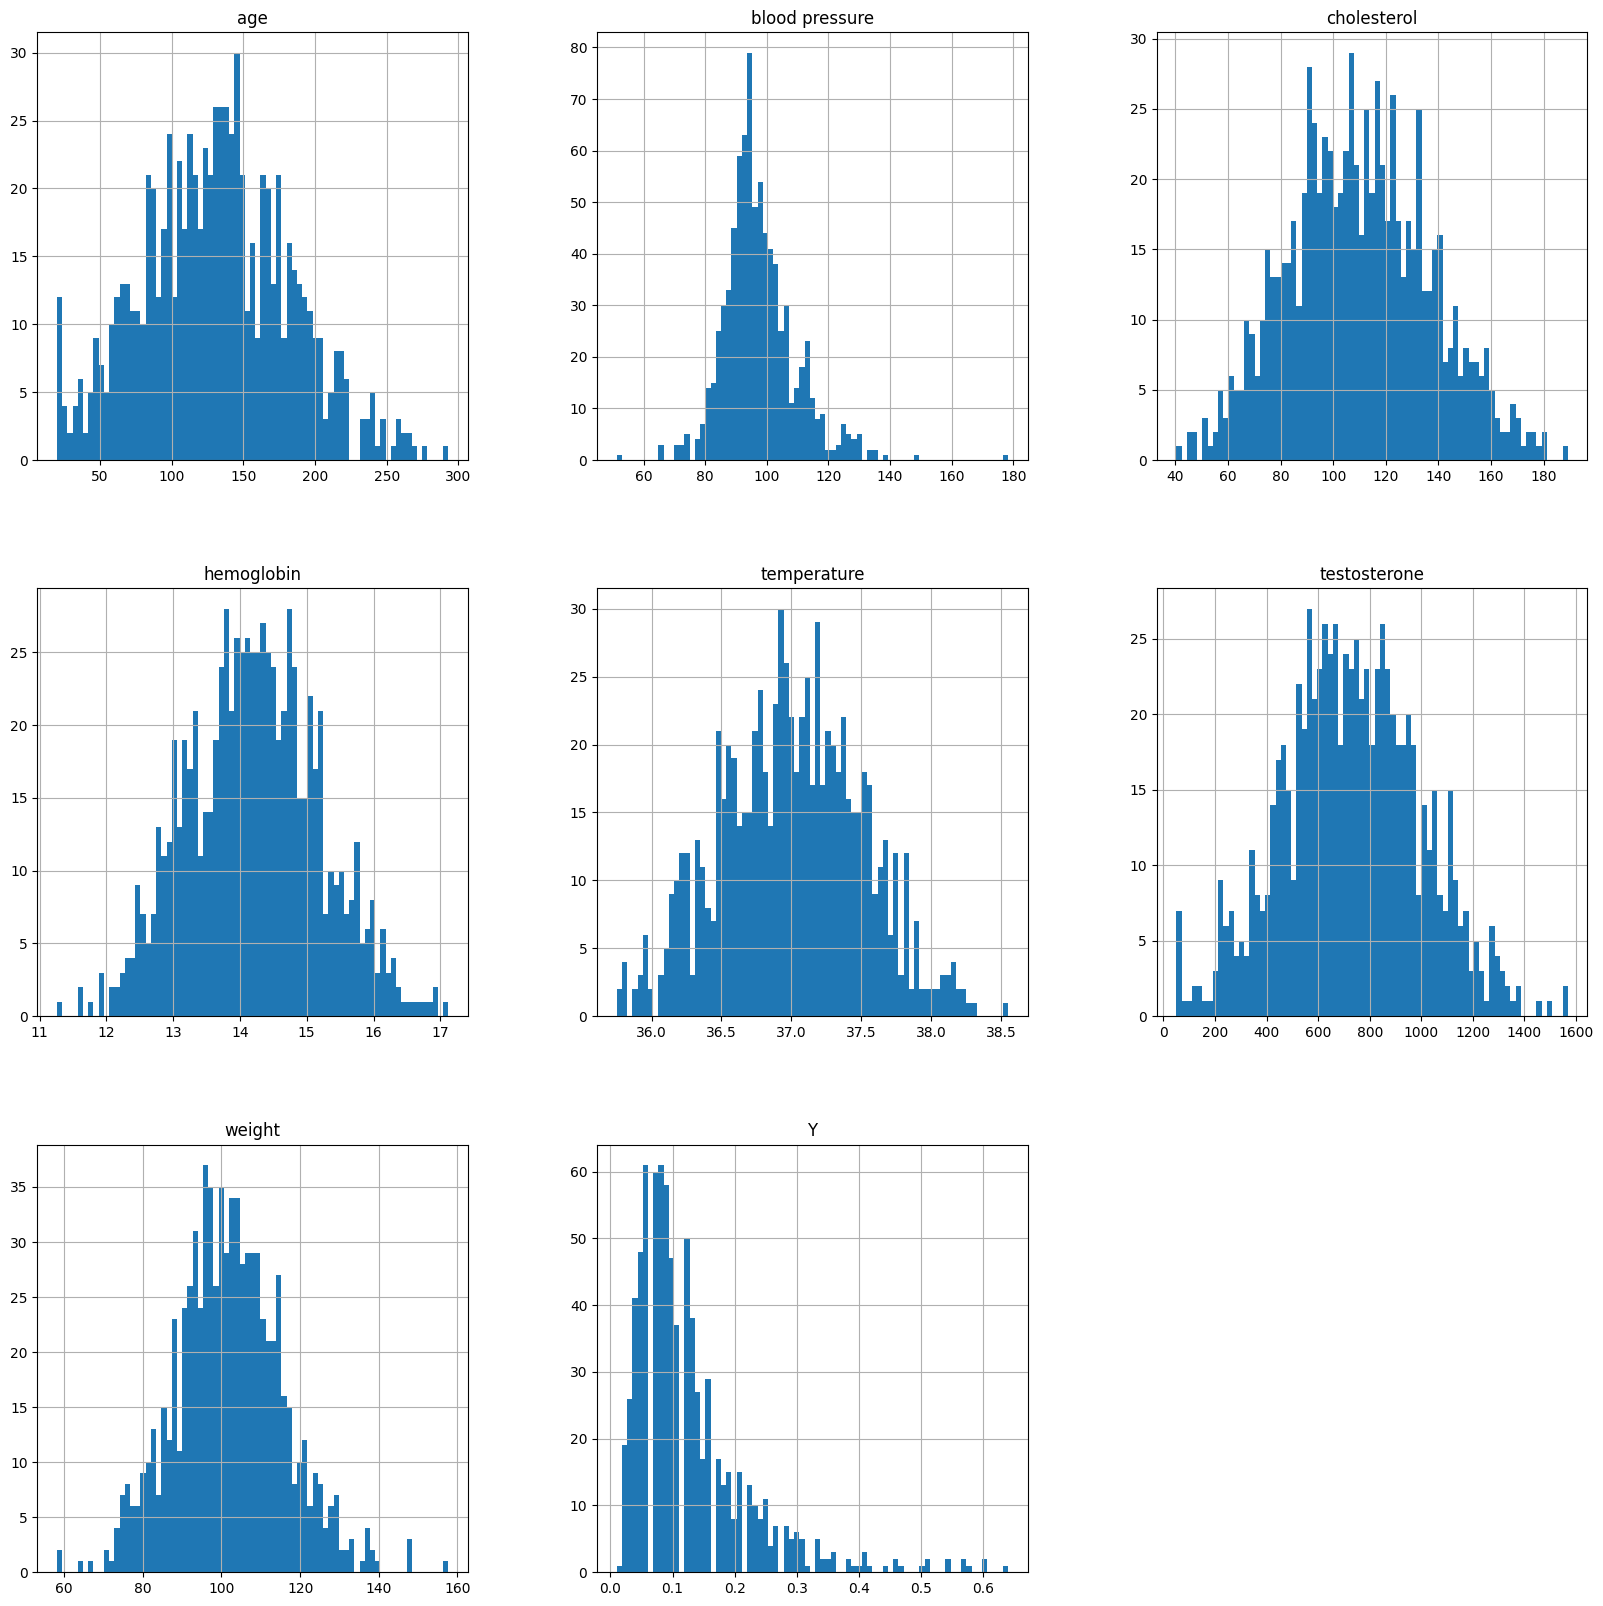

Xtab1 non numerical columns
6 Index(['blood type', 'physical activity', 'sarsaparilla', 'smurfberry liquor',
       'smurfin donuts', 'img_filename'],
      dtype='object')
Xtab1 non numerical columns distribution


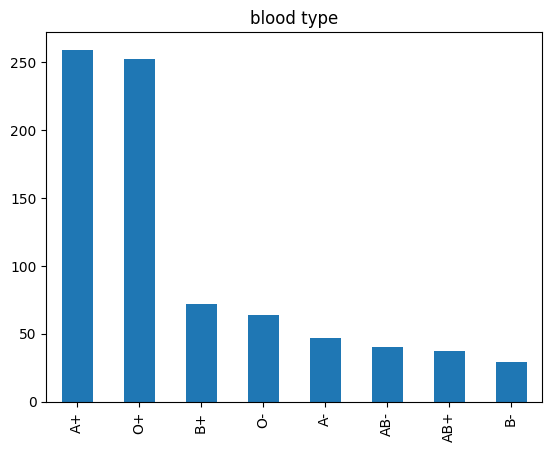

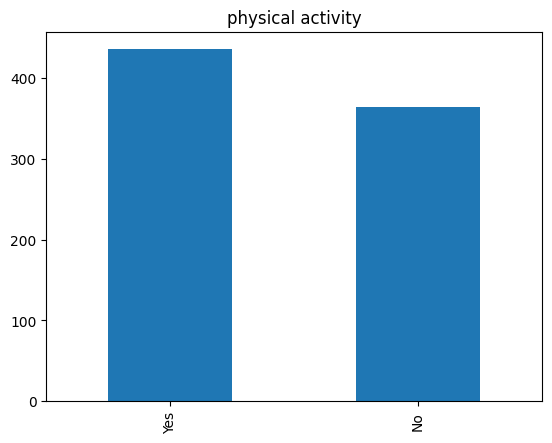

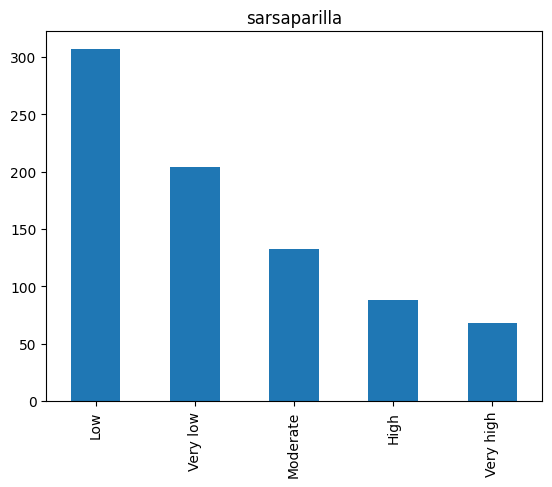

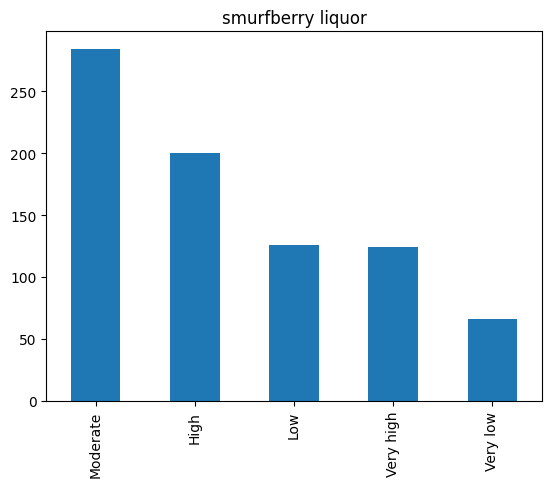

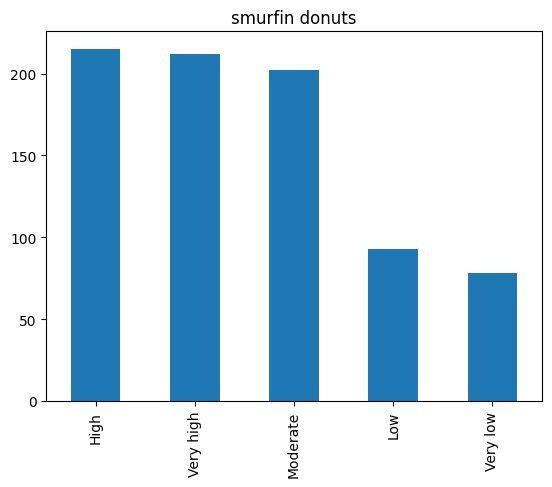

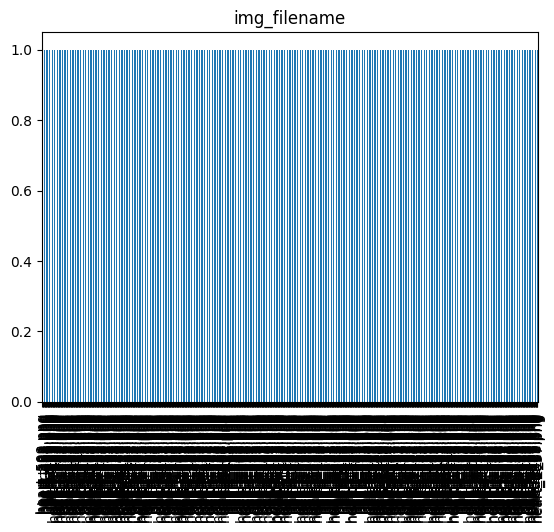

In [5]:
# get the columns of the data
print('Ximg1 columns')
columns = Xtab1.columns
print(len(columns),columns)
# plot the distribution of the data
print('Ximg1 distribution')
Xtab1.hist(figsize=(20,20), bins=75)
plt.show()
# Non numerical columns
print('Xtab1 non numerical columns')
non_numerical_columns = Xtab1.select_dtypes(exclude=[np.number]).columns
print(len(non_numerical_columns),non_numerical_columns)
# plot the distribution of the frequency of the non numerical columns
print('Xtab1 non numerical columns distribution')
for column in non_numerical_columns:
    Xtab1[column].value_counts().plot(kind="bar", title=column)
    plt.show()

In [6]:
# plot the amount of missing data for each column
print('Xtab1 missing data')
missing_data = Xtab1.isnull().sum()
missing_data

Xtab1 missing data


age                  0
blood pressure       0
blood type           0
cholesterol          0
hemoglobin           0
physical activity    0
sarsaparilla         0
smurfberry liquor    0
smurfin donuts       0
temperature          0
testosterone         0
weight               0
img_filename         0
Y                    0
dtype: int64

Y1 distribution


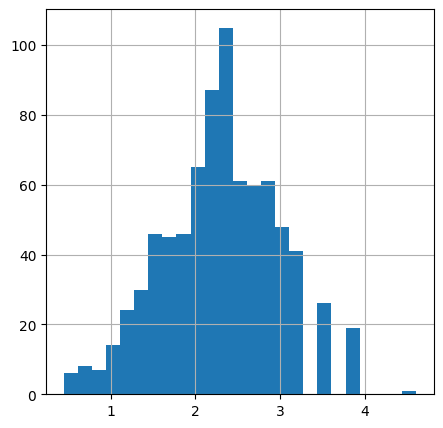

In [7]:
# plot the log of the attribute Y in tab1
print('Y1 distribution')
log_Y1 = np.log(Xtab1['Y']) * -1
log_Y1.hist(figsize=(5,5), bins=25)

# add it to the data
Xtab1['LOG_Y'] = log_Y1

In [8]:
# Encode the blood type using a custom binary encoding
def encode_blood_type(blood_type):
    # print(blood_type)
    # Encoding for RH factor
    rh = 1 if '+' in blood_type else 0

    # Encoding for A, B, O types
    a = 1 if 'A' in blood_type else 0
    b = 1 if 'B' in blood_type else 0
    o = 1 if 'O' in blood_type else 0
    # print(blood_type, rh, a, b, o)
    return pd.Series([rh, a, b])

blood_types = Xtab1['blood type'].values.tolist()
encoded_blood_types = [encode_blood_type(blood_type) for blood_type in blood_types]
encoded_blood_types = pd.DataFrame(encoded_blood_types)
encoded_blood_types.columns = ['RH', 'A', 'B']

Xtab1 = pd.concat([Xtab1, encoded_blood_types], axis=1)
Xtab1.head()

,age,blood pressure,blood type,cholesterol,hemoglobin,physical activity,sarsaparilla,smurfberry liquor,smurfin donuts,temperature,testosterone,weight,img_filename,Y,LOG_Y,RH,A,B
0,113,94.65,O+,103.63,14.32,No,Moderate,High,High,36.40,891.91,101.34,heart_509.png,0.26,1.347074,1,0,0
1,160,102.33,AB+,131.44,15.85,Yes,Very low,High,Very high,37.17,672.22,117.66,heart_159.png,0.08,2.525729,1,1,1
2,193,121.94,A+,156.47,13.02,No,Very high,Moderate,Very high,36.84,951.98,111.73,heart_502.png,0.27,1.309333,1,1,0
3,130,96.02,O+,126.46,12.91,Yes,Low,High,High,37.89,609.18,80.75,heart_947.png,0.08,2.525729,1,0,0
4,145,92.00,B+,102.23,14.72,Yes,Very low,Low,High,37.40,573.76,77.11,heart_1029.png,0.06,2.813411,1,0,1


In [9]:
# encode physical activity to numerical values: 1 for yes and 0 for no
phy_values = Xtab1['physical activity'].values.tolist()
phy_values = [1 if phy_value == 'Yes' else 0 for phy_value in phy_values]
Xtab1['PHY'] = phy_values
# apply stochastic soft labeling to this column
Xtab1['PHY'] = Xtab1['PHY'].apply(lambda x: np.random.normal(x, 0.05))
Xtab1.head()

,age,blood pressure,blood type,cholesterol,hemoglobin,physical activity,sarsaparilla,smurfberry liquor,smurfin donuts,temperature,testosterone,weight,img_filename,Y,LOG_Y,RH,A,B,PHY
0,113,94.65,O+,103.63,14.32,No,Moderate,High,High,36.40,891.91,101.34,heart_509.png,0.26,1.347074,1,0,0,-0.014567
1,160,102.33,AB+,131.44,15.85,Yes,Very low,High,Very high,37.17,672.22,117.66,heart_159.png,0.08,2.525729,1,1,1,0.976073
2,193,121.94,A+,156.47,13.02,No,Very high,Moderate,Very high,36.84,951.98,111.73,heart_502.png,0.27,1.309333,1,1,0,-0.030970
3,130,96.02,O+,126.46,12.91,Yes,Low,High,High,37.89,609.18,80.75,heart_947.png,0.08,2.525729,1,0,0,0.911801
4,145,92.00,B+,102.23,14.72,Yes,Very low,Low,High,37.40,573.76,77.11,heart_1029.png,0.06,2.813411,1,0,1,0.991978


In [10]:
# encode sarsaparilla to numerical values: 0 for Very low, 1 for Low, 2 for Moderate, 3 for High, 4 for Very high
sarsaparilla_values = Xtab1['sarsaparilla'].values.tolist()
sarsaparilla_values = [0 if sarsaparilla_value == 'Very low' else 1 if sarsaparilla_value == 'Low' else 2 if sarsaparilla_value == 'Moderate' else 3 if sarsaparilla_value == 'High' else 4 for sarsaparilla_value in sarsaparilla_values]
Xtab1['SAR'] = sarsaparilla_values
# apply stochastic soft labeling to this column
Xtab1['SAR'] = Xtab1['SAR'].apply(lambda x: x + np.random.normal(0, 0.05))
Xtab1.head()

,age,blood pressure,blood type,cholesterol,hemoglobin,physical activity,sarsaparilla,smurfberry liquor,smurfin donuts,temperature,testosterone,weight,img_filename,Y,LOG_Y,RH,A,B,PHY,SAR
0,113,94.65,O+,103.63,14.32,No,Moderate,High,High,36.40,891.91,101.34,heart_509.png,0.26,1.347074,1,0,0,-0.014567,2.002835
1,160,102.33,AB+,131.44,15.85,Yes,Very low,High,Very high,37.17,672.22,117.66,heart_159.png,0.08,2.525729,1,1,1,0.976073,-0.031154
2,193,121.94,A+,156.47,13.02,No,Very high,Moderate,Very high,36.84,951.98,111.73,heart_502.png,0.27,1.309333,1,1,0,-0.030970,4.000844
3,130,96.02,O+,126.46,12.91,Yes,Low,High,High,37.89,609.18,80.75,heart_947.png,0.08,2.525729,1,0,0,0.911801,1.045393
4,145,92.00,B+,102.23,14.72,Yes,Very low,Low,High,37.40,573.76,77.11,heart_1029.png,0.06,2.813411,1,0,1,0.991978,0.038083


In [11]:
# encode smurfberry liquor to numerical values: 0 for Very low, 1 for Low, 2 for Moderate, 3 for High, 4 for Very high
smurfberry_liquor_values = Xtab1['smurfberry liquor'].values.tolist()
smurfberry_liquor_values = [0 if smurfberry_liquor_value == 'Very low' else 1 if smurfberry_liquor_value == 'Low' else 2 if smurfberry_liquor_value == 'Moderate' else 3 if smurfberry_liquor_value == 'High' else 4 for smurfberry_liquor_value in smurfberry_liquor_values]
Xtab1['SML'] = smurfberry_liquor_values
# apply stochastic soft labeling to this column
Xtab1['SML'] = Xtab1['SML'].apply(lambda x: x + np.random.normal(0, 0.05))
Xtab1.head()

,age,blood pressure,blood type,cholesterol,hemoglobin,physical activity,sarsaparilla,smurfberry liquor,smurfin donuts,temperature,...,weight,img_filename,Y,LOG_Y,RH,A,B,PHY,SAR,SML
0,113,94.65,O+,103.63,14.32,No,Moderate,High,High,36.40,...,101.34,heart_509.png,0.26,1.347074,1,0,0,-0.014567,2.002835,3.034987
1,160,102.33,AB+,131.44,15.85,Yes,Very low,High,Very high,37.17,...,117.66,heart_159.png,0.08,2.525729,1,1,1,0.976073,-0.031154,2.895668
2,193,121.94,A+,156.47,13.02,No,Very high,Moderate,Very high,36.84,...,111.73,heart_502.png,0.27,1.309333,1,1,0,-0.030970,4.000844,1.975396
3,130,96.02,O+,126.46,12.91,Yes,Low,High,High,37.89,...,80.75,heart_947.png,0.08,2.525729,1,0,0,0.911801,1.045393,3.020141
4,145,92.00,B+,102.23,14.72,Yes,Very low,Low,High,37.40,...,77.11,heart_1029.png,0.06,2.813411,1,0,1,0.991978,0.038083,0.975376


In [12]:
# encode smurfin donuts to numerical values: 0 for Very low, 1 for Low, 2 for Moderate, 3 for High, 4 for Very high
smurfin_donuts_values = Xtab1['smurfin donuts'].values.tolist()
smurfin_donuts_values = [0 if smurfin_donuts_value == 'Very low' else 1 if smurfin_donuts_value == 'Low' else 2 if smurfin_donuts_value == 'Moderate' else 3 if smurfin_donuts_value == 'High' else 4 for smurfin_donuts_value in smurfin_donuts_values]
Xtab1['SMD'] = smurfin_donuts_values
# apply stochastic soft labeling to this column
Xtab1['SMD'] = Xtab1['SMD'].apply(lambda x: x + np.random.normal(0, 0.05))
Xtab1.head()

,age,blood pressure,blood type,cholesterol,hemoglobin,physical activity,sarsaparilla,smurfberry liquor,smurfin donuts,temperature,...,img_filename,Y,LOG_Y,RH,A,B,PHY,SAR,SML,SMD
0,113,94.65,O+,103.63,14.32,No,Moderate,High,High,36.40,...,heart_509.png,0.26,1.347074,1,0,0,-0.014567,2.002835,3.034987,2.980077
1,160,102.33,AB+,131.44,15.85,Yes,Very low,High,Very high,37.17,...,heart_159.png,0.08,2.525729,1,1,1,0.976073,-0.031154,2.895668,4.003316
2,193,121.94,A+,156.47,13.02,No,Very high,Moderate,Very high,36.84,...,heart_502.png,0.27,1.309333,1,1,0,-0.030970,4.000844,1.975396,4.029341
3,130,96.02,O+,126.46,12.91,Yes,Low,High,High,37.89,...,heart_947.png,0.08,2.525729,1,0,0,0.911801,1.045393,3.020141,2.983683
4,145,92.00,B+,102.23,14.72,Yes,Very low,Low,High,37.40,...,heart_1029.png,0.06,2.813411,1,0,1,0.991978,0.038083,0.975376,2.984100


In [13]:
# standardize the numerical columns
numerical_columns = Xtab1.select_dtypes(include=[np.number]).columns
scaler = StandardScaler
Xtab1[numerical_columns] = scaler().fit_transform(Xtab1[numerical_columns])

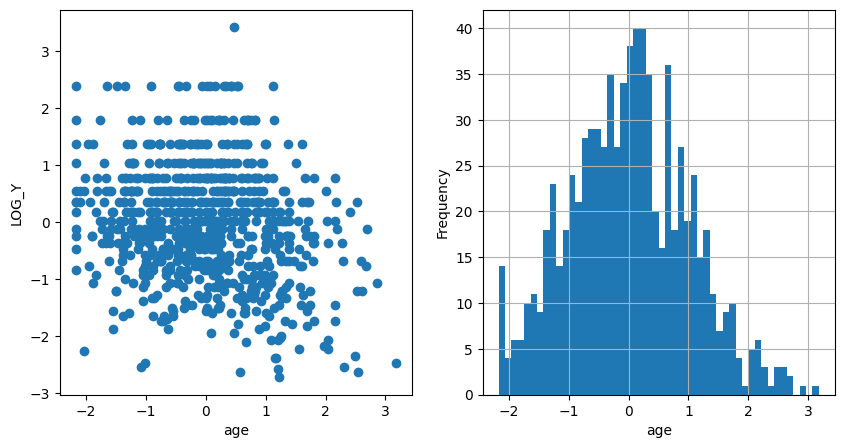

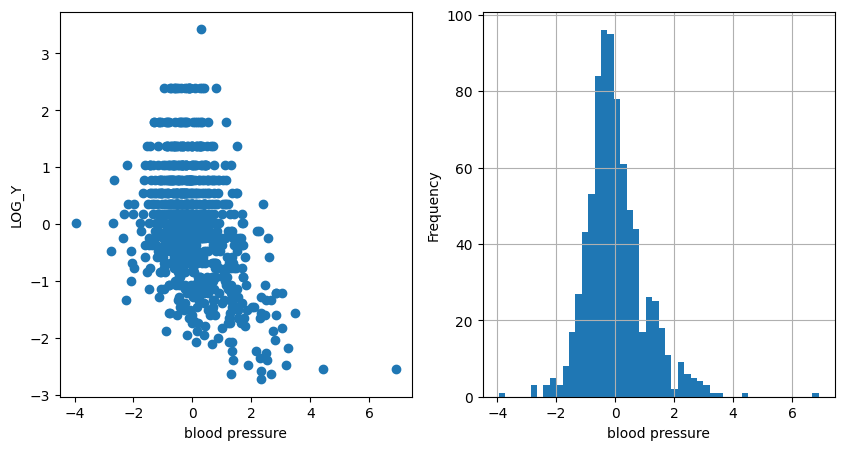

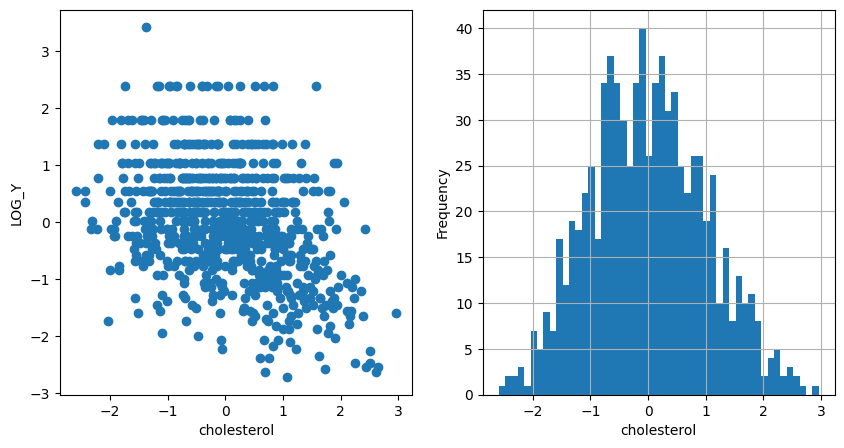

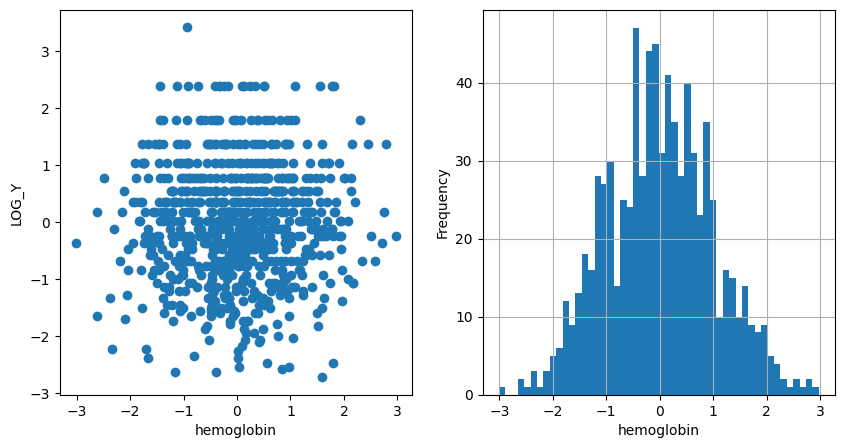

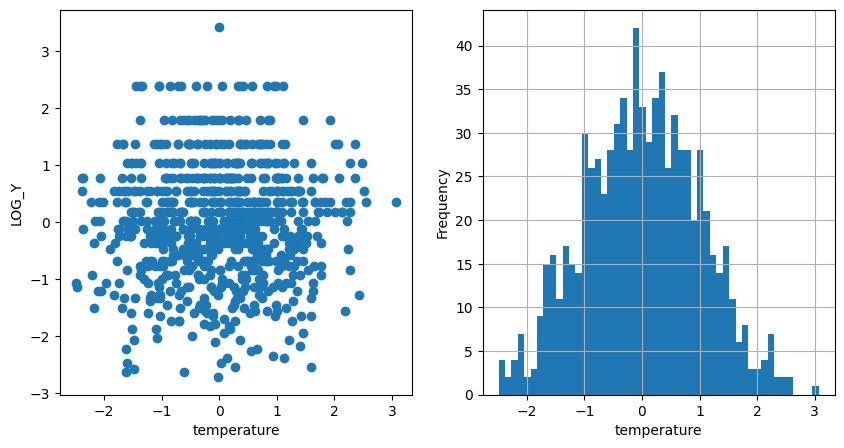

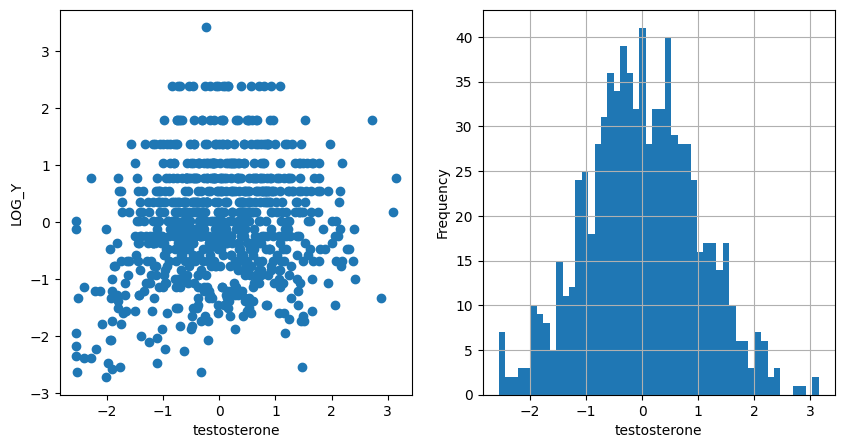

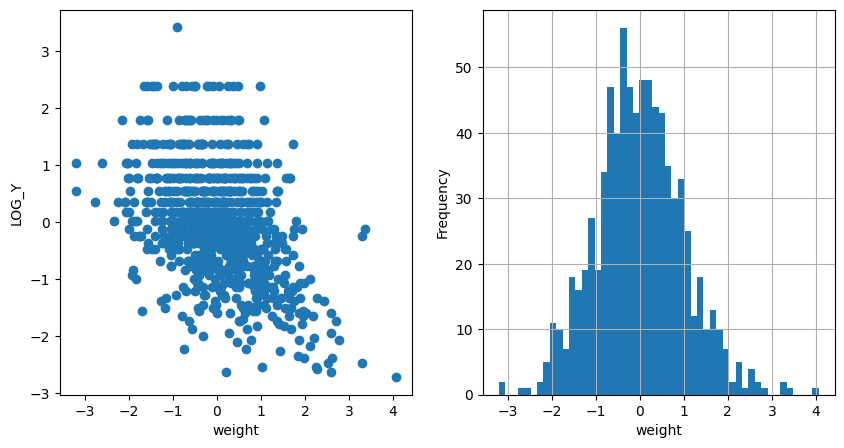

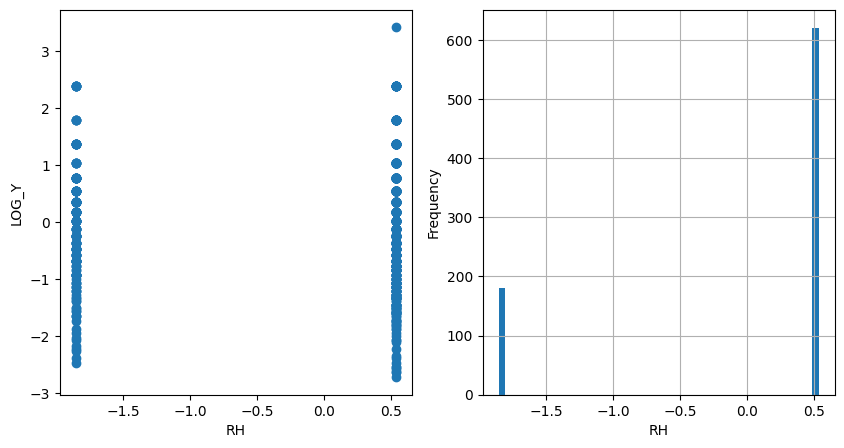

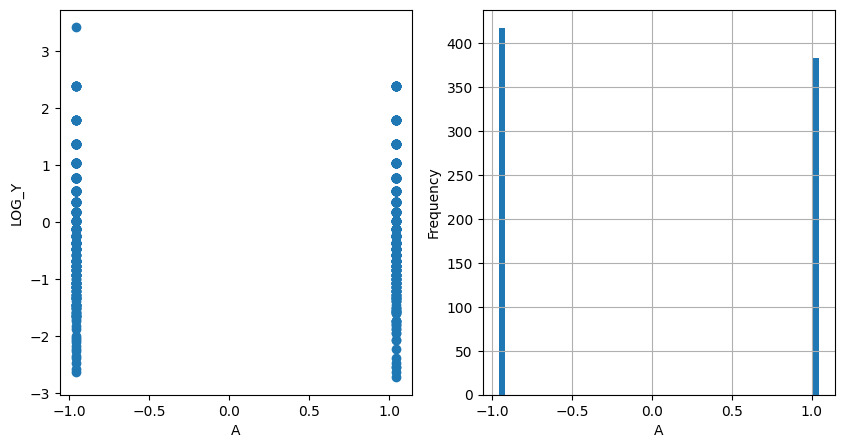

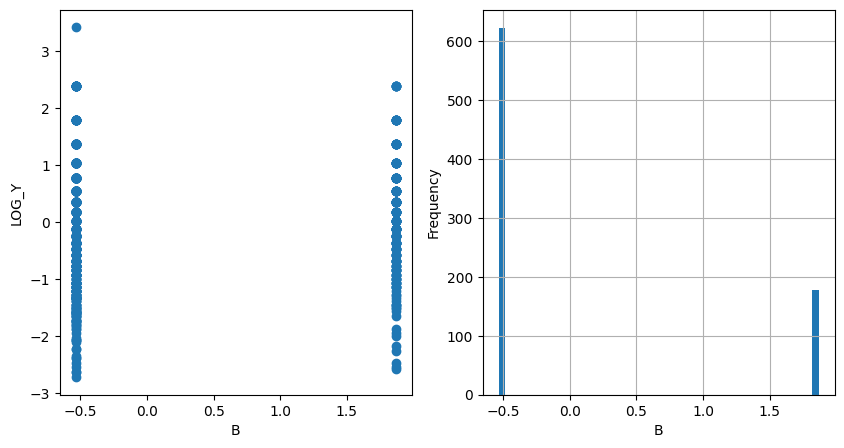

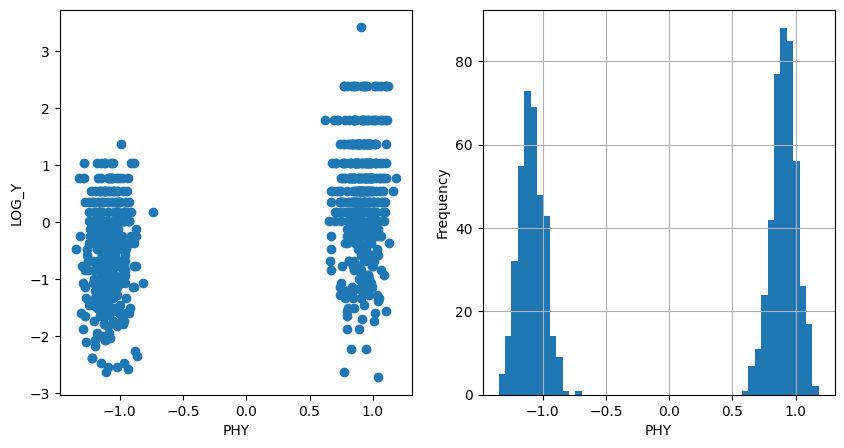

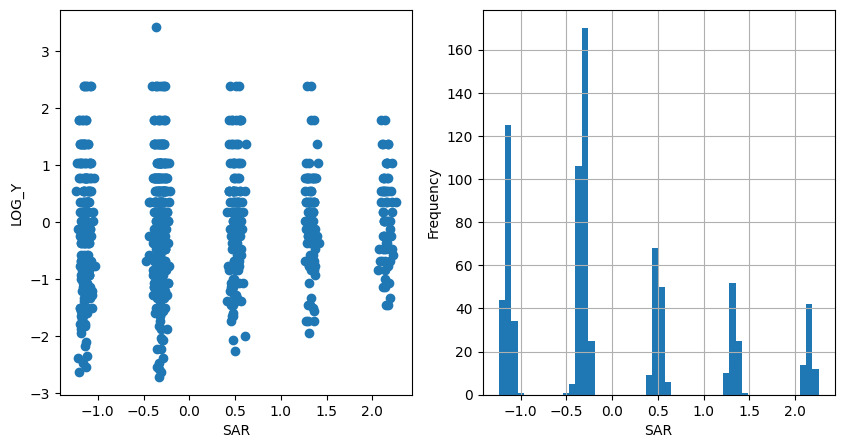

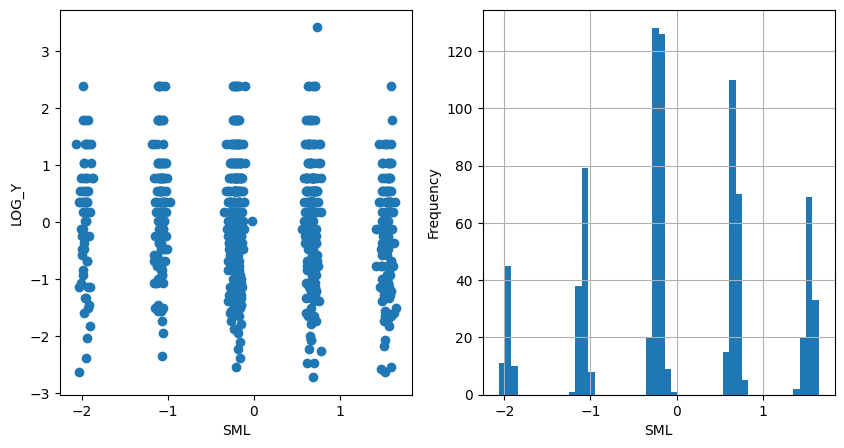

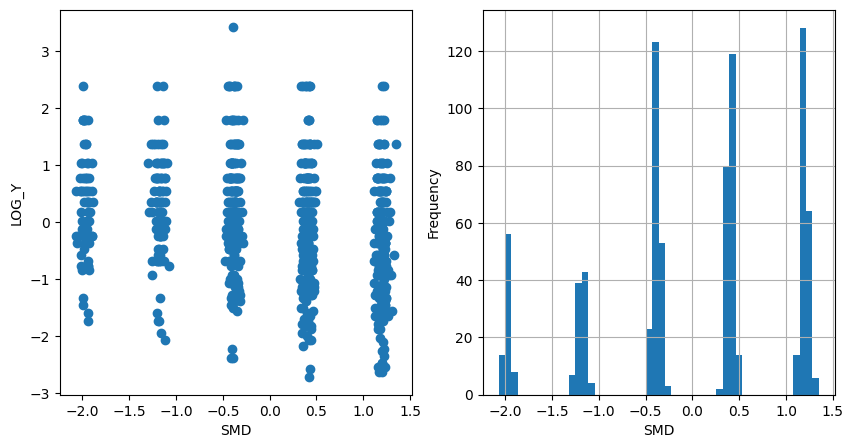

In [14]:
# Plot the corelation between each attribute and the target attribute and next to it plot a hist the frequency of the attribute
target = 'LOG_Y'
columns = Xtab1.columns
# drop the columns that are encoded
columns = columns.drop(['blood type', 'physical activity', 'sarsaparilla', 'smurfberry liquor', 'smurfin donuts', 'img_filename', 'Y'])
for column in columns:
    if column != target:
        plt.figure(figsize=(5,5))
        plt.subplot(1, 2, 1)
        plt.scatter(Xtab1[column], Xtab1[target])
        plt.xlabel(column)
        plt.ylabel(target)
        plt.subplot(1, 2, 2)
        Xtab1[column].hist(figsize=(10,5), bins=50)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

In [15]:
# Calculate the mutual information between each attribute and the target attribute
target = 'LOG_Y'
columns = Xtab1.columns
# drop the columns that are encoded
columns = columns.drop(['blood type', 'physical activity', 'sarsaparilla', 'smurfberry liquor', 'smurfin donuts', 'img_filename', 'Y'])
mis = {}
for column in columns:
    # if column != target:
        mi = feature_selection.mutual_info_regression(Xtab1[[column]], Xtab1[target])
        mis[column] = mi[0]

mis = pd.DataFrame.from_dict(mis, orient='index')
mis.columns = ['MI']
mis = mis.sort_values(by=['MI'], ascending=False)
mis

,MI
LOG_Y,3.258388
weight,0.111238
blood pressure,0.095907
PHY,0.090846
cholesterol,0.083164
testosterone,0.038570
age,0.028885
SMD,0.025749
SAR,0.006965
temperature,0.005071


In [16]:
# calculate the relevance of each attribute to the target attribute
target = 'LOG_Y'
columns = Xtab1.columns
relevances = {}
# drop the columns that are encoded
columns = columns.drop(['blood type', 'physical activity', 'sarsaparilla', 'smurfberry liquor', 'smurfin donuts', 'img_filename', 'Y'])
for column in columns:
    if column != target:
        r = stats.pearsonr(Xtab1[column], Xtab1[target])
        relevances[column] = r

relevances = pd.DataFrame.from_dict(relevances, orient='index')
relevances.columns = ['R', 'P']
relevances = relevances.sort_values(by=['R'], ascending=False)
relevances

,R,P
PHY,0.450351,3.288989e-41
testosterone,0.181154,2.488978e-07
RH,0.051712,1.439249e-01
SAR,0.045269,2.008807e-01
temperature,0.028895,4.144072e-01
hemoglobin,0.022779,5.199972e-01
B,-0.001158,9.739059e-01
A,-0.001869,9.579022e-01
SML,-0.100457,4.453642e-03
age,-0.199474,1.267181e-08


In [17]:
# calculate the redundancy of each attribute to each other
columns = Xtab1.columns
# drop the columns that are encoded
columns = columns.drop(['blood type', 'physical activity', 'sarsaparilla', 'smurfberry liquor', 'smurfin donuts', 'img_filename', 'Y'])
redundancies = {}
for column1 in columns:
    for column2 in columns:
        if column1 != column2:
            # check if the combination of the two columns is already calculated
            if column1 + ' - ' + column2 in redundancies or column2 + ' - ' + column1 in redundancies:
                continue
            r = stats.pearsonr(Xtab1[column1], Xtab1[column2])
            redundancies[column1 + ' - ' + column2] = r

redundancies = pd.DataFrame.from_dict(redundancies, orient='index')
redundancies.columns = ['R', 'P']
redundancies = redundancies.sort_values(by=['R'], ascending=False)
redundancies.head(20)

,R,P
cholesterol - SMD,0.778227,2.099004e-163
cholesterol - weight,0.528377,9.974090e-59
testosterone - SAR,0.492730,3.676847e-50
age - blood pressure,0.488282,3.672634e-49
LOG_Y - PHY,0.450351,3.288989e-41
blood pressure - cholesterol,0.450220,3.489848e-41
blood pressure - weight,0.403169,1.270750e-32
blood pressure - SMD,0.278623,9.920752e-16
weight - SMD,0.250723,6.215226e-13
testosterone - LOG_Y,0.181154,2.488978e-07


In [29]:
class MeanRegressor:
    def fit(self, X, y):
        self.mean = np.mean(y)
    def predict(self, X):
        return np.ones(X.shape[0]) * self.mean

In [30]:
columns = Xtab1.columns
# drop the columns that are encoded
columns = columns.drop(['blood type', 'physical activity', 'sarsaparilla', 'smurfberry liquor', 'smurfin donuts', 'img_filename', 'Y', 'LOG_Y'])
combinations = []

for i in range(len(columns)-3, len(columns)+1):
    combinations.append(list(itertools.combinations(columns, i)))

# Flatten the list
combinations = [item for sublist in combinations for item in sublist]

# Create a dictionary to store the mean squared error for each combination
combinations_mse = {}
combinations_models = {}

# calculate the mean squared error for each combination for the models: 
# Random Forest Regressor; 
# Linear Regression; 
# Decision Tree Regressor; 
# Support Vector Regressor; 
# Gradient Boosting Regressor; 
# K Nearest Neighbors Regressor;
# Multi Layer Perceptron Regressor; 
# Bagging Regressor; 
# Mean Regressor

for combination in tqdm.tqdm(combinations):
    # print(combination)
    # Create a dataframe with the selected columns
    X = Xtab1[list(combination)]
    # Create the target attribute
    y = Xtab1['LOG_Y']
    # Split the data into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # Create the models
    models = [
        ensemble.RandomForestRegressor(n_estimators=100, n_jobs=-1),
        linear_model.LinearRegression(n_jobs=-1),
        tree.DecisionTreeRegressor(max_depth=5, random_state=0),
        svm.SVR(kernel='rbf', gamma='auto', C=1.0, epsilon=0.1),
        ensemble.GradientBoostingRegressor( n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='absolute_error'),
        neighbors.KNeighborsRegressor(n_neighbors=5, n_jobs=-1),
        # ensemble.AdaBoostRegressor(),
        # linear_model.SGDRegressor(),
        # linear_model.PassiveAggressiveRegressor(),
        # linear_model.Ridge(),
        # linear_model.Lasso(),
        # linear_model.ElasticNet(),
        # linear_model.BayesianRidge(),
        # linear_model.ARDRegression(),
        linear_model.HuberRegressor(),
        # linear_model.TheilSenRegressor(),
        # linear_model.RANSACRegressor(),
        # linear_model.TweedieRegressor(),
        neural_network.MLPRegressor( hidden_layer_sizes=(50, 50), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.0001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
        # ensemble.BaggingRegressor(),
        MeanRegressor()
    ]
    for model in models:
        # print(model)
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        predictions = model.predict(X_test)
        # Calculate the mean squared error
        mse = metrics.mean_squared_error(y_test, predictions)
        # print(mse)
        # Store the mean squared error
        combinations_mse[str(model) + ' - ' + str(combination)] = mse
        combinations_models[str(model) + ' - ' + str(combination)] = model

combinations_mse = pd.DataFrame.from_dict(combinations_mse, orient='index')
combinations_mse.columns = ['COMB', 'MSE']
combinations_mse = combinations_mse.sort_values(by=['MSE'], ascending=True)
combinations_mse

100%|██████████| 470/470 [4:00:54<00:00, 30.75s/it]   


,MSE
"MLPRegressor(hidden_layer_sizes=(50, 50), learning_rate_init=0.0001) - ('blood pressure', 'cholesterol', 'temperature', 'testosterone', 'weight', 'RH', 'A', 'PHY', 'SAR', 'SML', 'SMD')",0.360024
"GradientBoostingRegressor(loss='absolute_error', max_depth=1, random_state=0) - ('blood pressure', 'cholesterol', 'temperature', 'testosterone', 'weight', 'RH', 'A', 'PHY', 'SAR', 'SML', 'SMD')",0.377948
"LinearRegression(n_jobs=-1) - ('age', 'blood pressure', 'cholesterol', 'temperature', 'testosterone', 'weight', 'RH', 'B', 'PHY', 'SAR', 'SMD')",0.384186
"HuberRegressor() - ('age', 'blood pressure', 'cholesterol', 'temperature', 'testosterone', 'weight', 'RH', 'B', 'PHY', 'SAR', 'SMD')",0.385076
"HuberRegressor() - ('blood pressure', 'cholesterol', 'temperature', 'testosterone', 'weight', 'RH', 'A', 'PHY', 'SAR', 'SML', 'SMD')",0.389072
...,...
"<__main__.MeanRegressor object at 0x0000023CF1431C70> - ('age', 'blood pressure', 'cholesterol', 'hemoglobin', 'temperature', 'weight', 'RH', 'B', 'PHY', 'SML', 'SMD')",1.225558
"<__main__.MeanRegressor object at 0x0000023CF1C8F7F0> - ('cholesterol', 'hemoglobin', 'temperature', 'testosterone', 'RH', 'A', 'B', 'PHY', 'SAR', 'SML', 'SMD')",1.229356
"<__main__.MeanRegressor object at 0x0000023CF1765B80> - ('age', 'blood pressure', 'cholesterol', 'hemoglobin', 'temperature', 'RH', 'A', 'B', 'PHY', 'SML', 'SMD')",1.229560
"<__main__.MeanRegressor object at 0x0000023CF077BAC0> - ('age', 'blood pressure', 'cholesterol', 'hemoglobin', 'testosterone', 'RH', 'A', 'B', 'PHY', 'SAR', 'SMD')",1.262388


In [34]:
# save the results into a csv file
combinations_mse.to_csv('combinations_mse.csv')
# save the models into a pickle file
# with open('combinations_models.pickle', 'wb') as handle:
#     pickle.dump(combinations_models, handle, protocol=pickle.HIGHEST_PROTOCOL)

KeyboardInterrupt: 

In [33]:
csv_data = pd.read_csv('combinations_mse.csv')
csv_data['COMB']
# count the frequency of a feature in the combinations
features_frequency = []
models_frequency = []
for i, item in enumerate(csv_data['COMB']):
    if i > 50:
        break
    combination = item.split(' - ')[1]
    # remove the brackets from the combination
    combination = combination.replace('(', '')
    combination = combination.replace(')', '')
    combination = combination.replace('\'', '')
    combination = combination.replace(' ', '')
    features = combination.split(',')
    features_frequency += features
    model = item.split(' - ')[0]
    model_name = model.split('(')[0]
    models_frequency.append(model_name)

features_frequency = pd.DataFrame(features_frequency)
features_frequency.columns = ['FEATURE']
features_frequency = features_frequency['FEATURE'].value_counts()
print(features_frequency)
print("#"*50)
models_frequency = pd.DataFrame(models_frequency)
models_frequency.columns = ['MODEL']
models_frequency = models_frequency['MODEL'].value_counts()
print(models_frequency)

PHY              51
bloodpressure    50
SAR              50
weight           48
temperature      44
SML              43
cholesterol      41
testosterone     40
A                39
RH               38
age              38
hemoglobin       35
B                33
SMD              30
Name: FEATURE, dtype: int64
##################################################
GradientBoostingRegressor    13
MLPRegressor                 10
LinearRegression              9
HuberRegressor                8
SVR                           8
RandomForestRegressor         3
Name: MODEL, dtype: int64


In [34]:
selected_columns = ['blood pressure', 'cholesterol', 'temperature', 'testosterone', 'weight', 'RH', 'A', 'PHY', 'SAR', 'SML', 'SMD']
new_data = Xtab1[selected_columns]
# add the Ximg1 to the data
new_data = pd.concat([new_data, Ximg1], axis=1)

# drop the columns img_filename
new_data = new_data.drop(['img_filename'], axis=1)
# new_data.head()
target_data = Xtab1['LOG_Y']
target_data.head()
# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(new_data, target_data, test_size=0.2)
results = []
for i in range(10):
    print(f'\rIteration {i+1}/10')
    # fir a MLPRegressor model to the data
    model = neural_network.MLPRegressor( hidden_layer_sizes=(50, 50), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.0001, power_t=0.5, max_iter=400, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.fit(X_train, y_train)
    # make predictions
    predictions = model.predict(X_test)
    # calculate the mean squared error
    mse = metrics.mean_squared_error(y_test, predictions)
    results.append(mse)
mean = np.mean(results)
print('Mean Squared Error: ', mean)

Iteration 1/10
Iteration 2/10
Iteration 3/10
Iteration 4/10
Iteration 5/10
Iteration 6/10
Iteration 7/10
Iteration 8/10
Iteration 9/10
Iteration 10/10
Mean Squared Error:  0.48643773958007197


In [35]:
# MLPRegressor list of parameters that can be tuned with GridSearchCV and a list of values for each parameter
parameters = {
    'hidden_layer_sizes': [(16, 16), (32, 32), (64, 64)],  # Moderate complexity
    'activation': ['relu', 'tanh'],  # Commonly used activations
    'solver': ['adam'],  # 'adam' is generally a good default
    'alpha': [0.0001, 0.001, 0.01],  # Regularization term
    'learning_rate': ['constant', 'adaptive'],  # Adaptive can be beneficial
    'learning_rate_init': [0.001, 0.01],  # Initial learning rate
    'max_iter': [200, 300],  # Reasonable iterations for convergence
    'shuffle': [True],  # Usually beneficial to shuffle
    'random_state': [None, 42],  # 42 for reproducibility, None for random
    'warm_start': [False],  # Typically start training from scratch
    'momentum': [0.9, 0.95],  # Commonly used momentum values
    'validation_fraction': [0.1, 0.2],  # Fraction of training data for validation
}

# Create the model
model = neural_network.MLPRegressor()

# Create the grid search (by default uses 5-fold cross validation)
grid_search = model_selection.GridSearchCV(model, parameters, n_jobs=4, scoring='accuracy', verbose=10)
# Fit the grid search
grid_search.fit(X_train, y_train)
# Print the best parameters
print("the best parameters: ", grid_search.best_params_)
# Print the best score
print("the best score: ", grid_search.best_score_)
# test the model
predictions = grid_search.predict(X_test)
# calculate the mean squared error
mse = metrics.mean_squared_error(y_test, predictions)
print('Mean Squared Error: ', mse)
# save the model into a pickle file
with open('grid_search.pickle', 'wb') as handle:
    pickle.dump(grid_search, handle, protocol=pickle.HIGHEST_PROTOCOL)

# save the results into a csv file
grid_search_results = pd.DataFrame(grid_search.cv_results_)
grid_search_results.to_csv('grid_search_results.csv')

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
the best parameters:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (16, 16), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'validation_fraction': 0.1, 'warm_start': False}
the best score:  nan
Mean Squared Error:  0.32903434945282817
